In [49]:
import numpy as np
import pandas as pd
from ggplot import *
import statsmodels.api as sm

In [50]:
final = pd.read_csv('Datasets3-3-2.csv')

In [51]:
final.head()

,Store,Year,Promo,Sales,Quarter,Customers,Open,PromoFrequencyRatio,YearQuarter,prev1Quarter,prevQuarterChange
0,1,2015,37,345154,1,41502,76,0.486842,9,-61621.0,-128390.0
1,1,2014,31,345715,1,42177,76,0.407895,5,-41690.0,-73876.0
2,1,2013,35,398871,1,48662,75,0.466667,1,0.0,0.0
3,1,2015,35,325886,2,37429,72,0.486111,10,-19268.0,42353.0
4,1,2014,35,340912,2,40043,72,0.486111,6,-4803.0,36887.0


In [52]:
final['PromoFrequencyRatio'] = final['PromoFrequencyRatio'].round(decimals=1)

In [53]:
final = final[final.PromoFrequencyRatio <= 1]

In [54]:
final.head()

,Store,Year,Promo,Sales,Quarter,Customers,Open,PromoFrequencyRatio,YearQuarter,prev1Quarter,prevQuarterChange
0,1,2015,37,345154,1,41502,76,0.5,9,-61621.0,-128390.0
1,1,2014,31,345715,1,42177,76,0.4,5,-41690.0,-73876.0
2,1,2013,35,398871,1,48662,75,0.5,1,0.0,0.0
3,1,2015,35,325886,2,37429,72,0.5,10,-19268.0,42353.0
4,1,2014,35,340912,2,40043,72,0.5,6,-4803.0,36887.0


In [55]:
final['prev1Quarter'] = final['prev1Quarter'].apply(lambda x: int(round(x/1000)*1000))

In [56]:
final.head()

,Store,Year,Promo,Sales,Quarter,Customers,Open,PromoFrequencyRatio,YearQuarter,prev1Quarter,prevQuarterChange
0,1,2015,37,345154,1,41502,76,0.5,9,-62000,-128390.0
1,1,2014,31,345715,1,42177,76,0.4,5,-42000,-73876.0
2,1,2013,35,398871,1,48662,75,0.5,1,0,0.0
3,1,2015,35,325886,2,37429,72,0.5,10,-19000,42353.0
4,1,2014,35,340912,2,40043,72,0.5,6,-5000,36887.0


In [57]:
len(final.prev1Quarter.unique())

869

In [58]:
subset1 = pd.DataFrame(columns=['prev1Quarter', 'PromoFrequencyRatio'])
salesList = final.prev1Quarter.unique()
for sale in salesList:
    promo = final.loc[lambda x: x.prev1Quarter == sale].PromoFrequencyRatio
    a = {'prev1Quarter': sale,
         'PromoFrequencyRatio': promo.sum()/promo.count()}
    subset1 = subset1.append(a, ignore_index=True)

In [59]:
subset1.head()

,prev1Quarter,PromoFrequencyRatio
0,-62000.0,0.457143
1,-42000.0,0.440000
2,0.0,0.497895
3,-19000.0,0.476087
4,-5000.0,0.480682


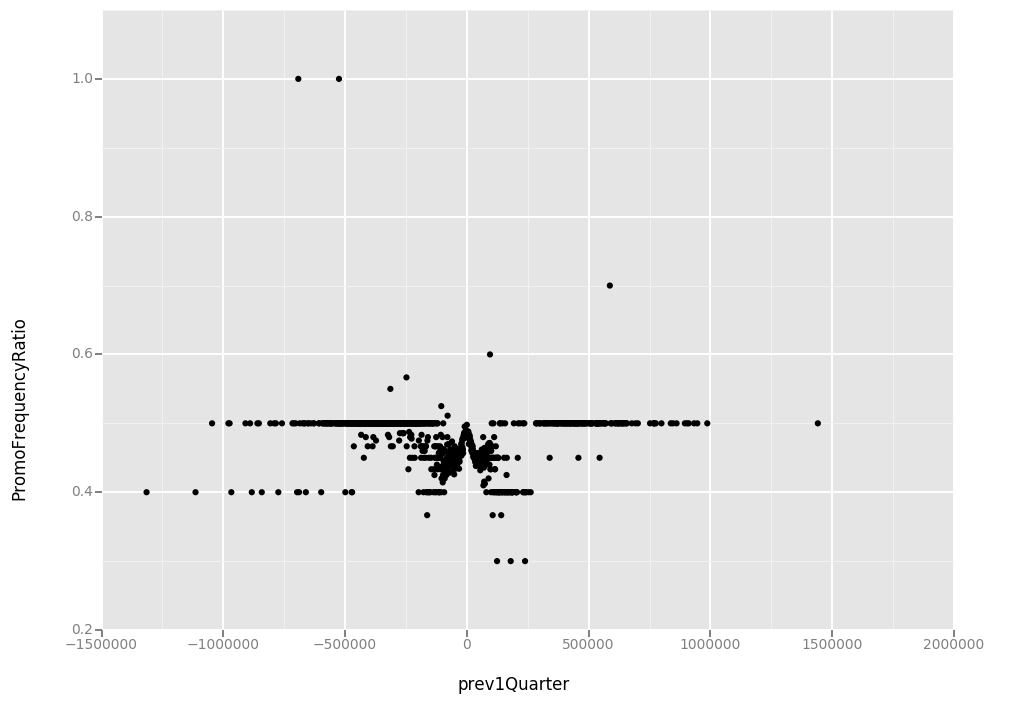

<ggplot: (8766050282332)>

In [60]:
ggplot(aes(x='prev1Quarter', y='PromoFrequencyRatio'), data=subset1) + geom_point()

In [61]:
final['prevQuarterChange'] = final['prevQuarterChange'].apply(lambda x: int(round(x/1000)*1000))

In [62]:
final.head()

,Store,Year,Promo,Sales,Quarter,Customers,Open,PromoFrequencyRatio,YearQuarter,prev1Quarter,prevQuarterChange
0,1,2015,37,345154,1,41502,76,0.5,9,-62000,-128000
1,1,2014,31,345715,1,42177,76,0.4,5,-42000,-74000
2,1,2013,35,398871,1,48662,75,0.5,1,0,0
3,1,2015,35,325886,2,37429,72,0.5,10,-19000,42000
4,1,2014,35,340912,2,40043,72,0.5,6,-5000,37000


In [63]:
subset2 = pd.DataFrame(columns=['prevQuarterChange', 'PromoFrequencyRatio'])
salesList = final.prevQuarterChange.unique()
for sale in salesList:
    promo = final.loc[lambda x: x.prevQuarterChange == sale].PromoFrequencyRatio
    a = {'prevQuarterChange': sale,
         'PromoFrequencyRatio': promo.sum()/promo.count()}
    subset2 = subset2.append(a, ignore_index=True)

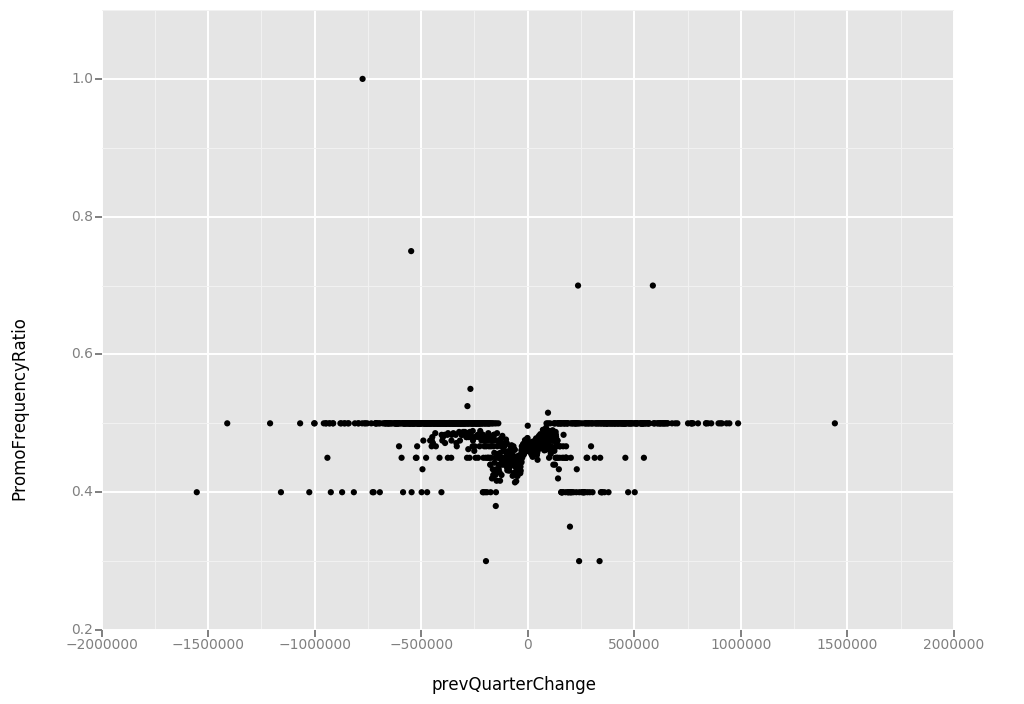

<ggplot: (-9223363270804567008)>

In [64]:
ggplot(aes(x='prevQuarterChange', y='PromoFrequencyRatio'), data=subset2) + geom_point()

In [65]:
final['Sales'] = final['Sales'].apply(lambda x: int(round(x/1000)*1000))

In [66]:
final.head()

,Store,Year,Promo,Sales,Quarter,Customers,Open,PromoFrequencyRatio,YearQuarter,prev1Quarter,prevQuarterChange
0,1,2015,37,345000,1,41502,76,0.5,9,-62000,-128000
1,1,2014,31,346000,1,42177,76,0.4,5,-42000,-74000
2,1,2013,35,399000,1,48662,75,0.5,1,0,0
3,1,2015,35,326000,2,37429,72,0.5,10,-19000,42000
4,1,2014,35,341000,2,40043,72,0.5,6,-5000,37000


In [67]:
subset3 = pd.DataFrame(columns=['Sales', 'PromoFrequencyRatio'])
salesList = final.Sales.unique()
for sale in salesList:
    promo = final.loc[lambda x: x.Sales == sale].PromoFrequencyRatio
    a = {'Sales': sale,
         'PromoFrequencyRatio': promo.sum()/promo.count()}
    subset3 = subset3.append(a, ignore_index=True)

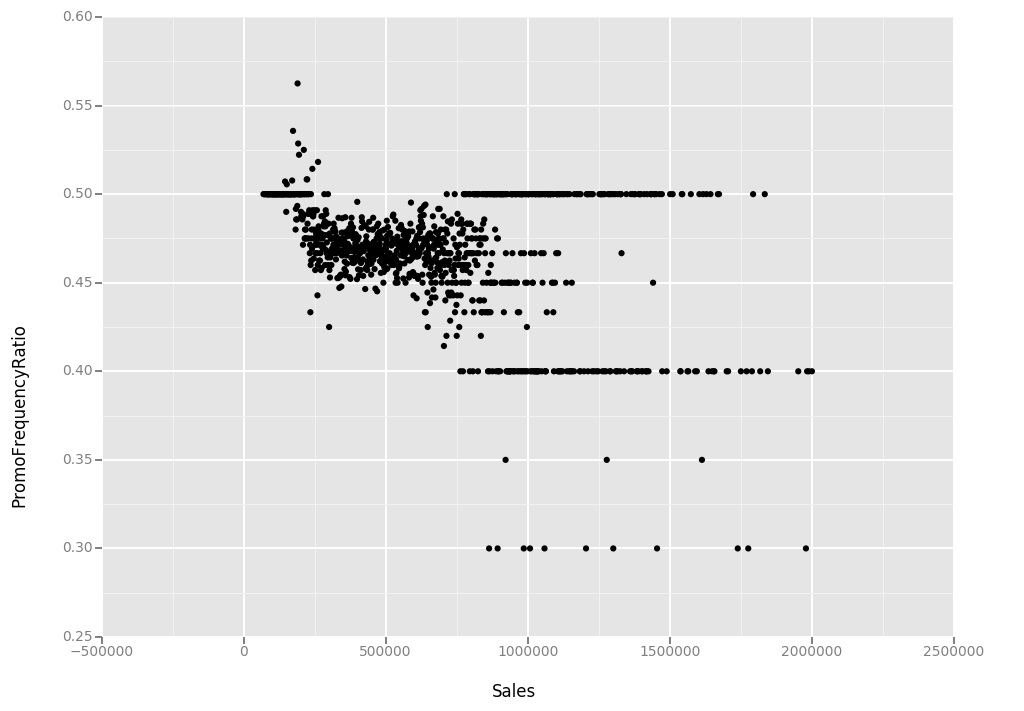

<ggplot: (8766050170046)>

In [68]:
ggplot(aes(x='Sales', y='PromoFrequencyRatio'), data=subset3) + geom_point()

In [30]:
subset1 = pd.DataFrame(columns=['YearQuarter', 'PromoRatio'])
quarterList = final.YearQuarter.unique()
for density in quarterList:
    a = {'YearQuarter': density,
         'PromoRatio': final.loc[lambda x: x.YearQuarter == density].PromoRatio.sum()/final.loc[lambda x: x.YearQuarter == density].PromoRatio.count()}
    subset1 = subset1.append(a, ignore_index=True)

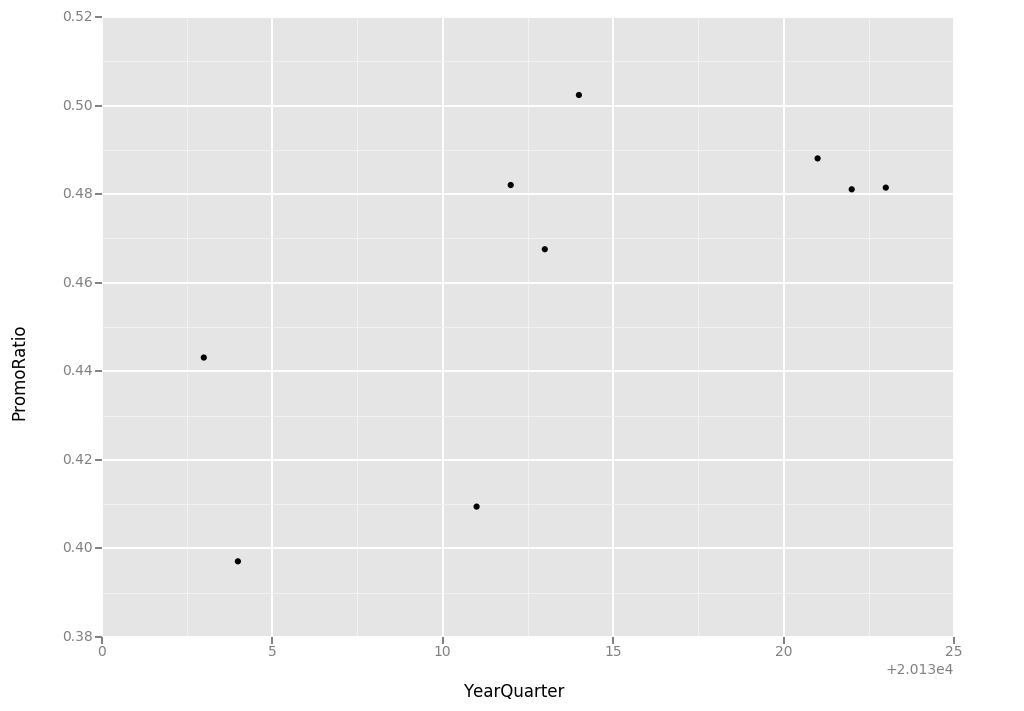

<ggplot: (8781541577308)>

In [36]:
ggplot(aes(x='YearQuarter', y='PromoRatio'), data=subset1) + geom_point()

In [32]:
subset2 = pd.DataFrame(columns=['YearQuarter', 'Sales'])
quarterList = final.YearQuarter.unique()
for density in quarterList:
    a = {'YearQuarter': density,
         'Sales': final.loc[lambda x: x.YearQuarter == density].Sales.sum()/final.loc[lambda x: x.YearQuarter == density].Sales.count()}
    subset2 = subset2.append(a, ignore_index=True)

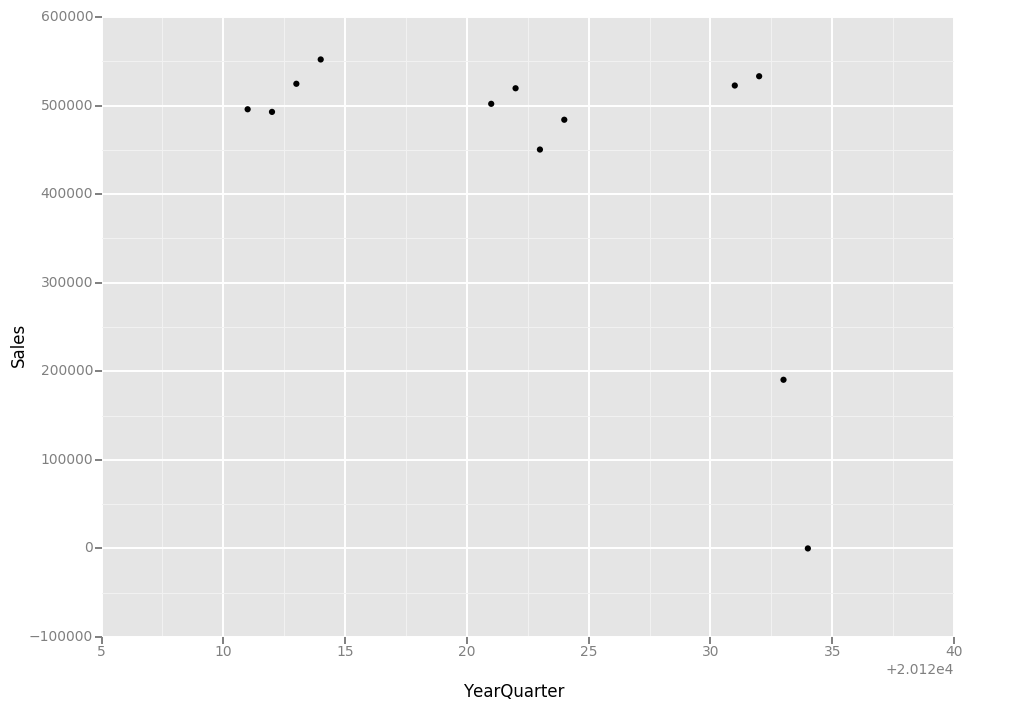

<ggplot: (8781541626074)>

In [33]:
ggplot(aes(x='YearQuarter', y='Sales'), data=subset2) + geom_point()

In [37]:
subset3 = pd.DataFrame(columns=['YearQuarter', 'Customers'])
quarterList = final.YearQuarter.unique()
for density in quarterList:
    a = {'YearQuarter': density,
         'Customers': final.loc[lambda x: x.YearQuarter == density].Customers.sum()/final.loc[lambda x: x.YearQuarter == density].Customers.count()}
    subset3 = subset3.append(a, ignore_index=True)

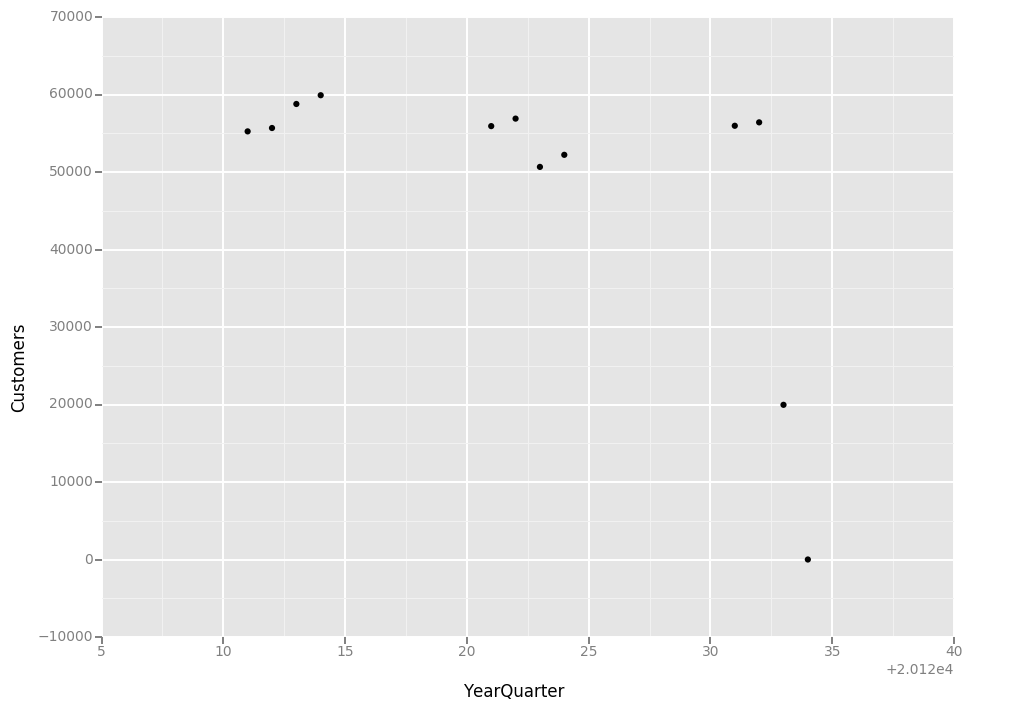

<ggplot: (-9223363255313173097)>

In [38]:
ggplot(aes(x='YearQuarter', y='Customers'), data=subset3) + geom_point()

In [ ]:
ggplot)